In [41]:
# for array computations and loading data
import numpy as np

# for building linear regression models and preparing data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn

# for building and training neural networks
import tensorflow as tf

# custom functions
import utils

# reduce display precision on numpy arrays
np.set_printoptions(precision=2)

# suppress warnings
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)

In [42]:
data = np.loadtxt('./data/data_w3_ex1.csv', delimiter=',')

x = data[:, 0]
y = data[:, 1]

x = np.expand_dims(x, axis=1)
y = np.expand_dims(y, axis=1)

print(f"x.shape={x.shape}")
print(f"y.shape={y.shape}")


x.shape=(50, 1)
y.shape=(50, 1)


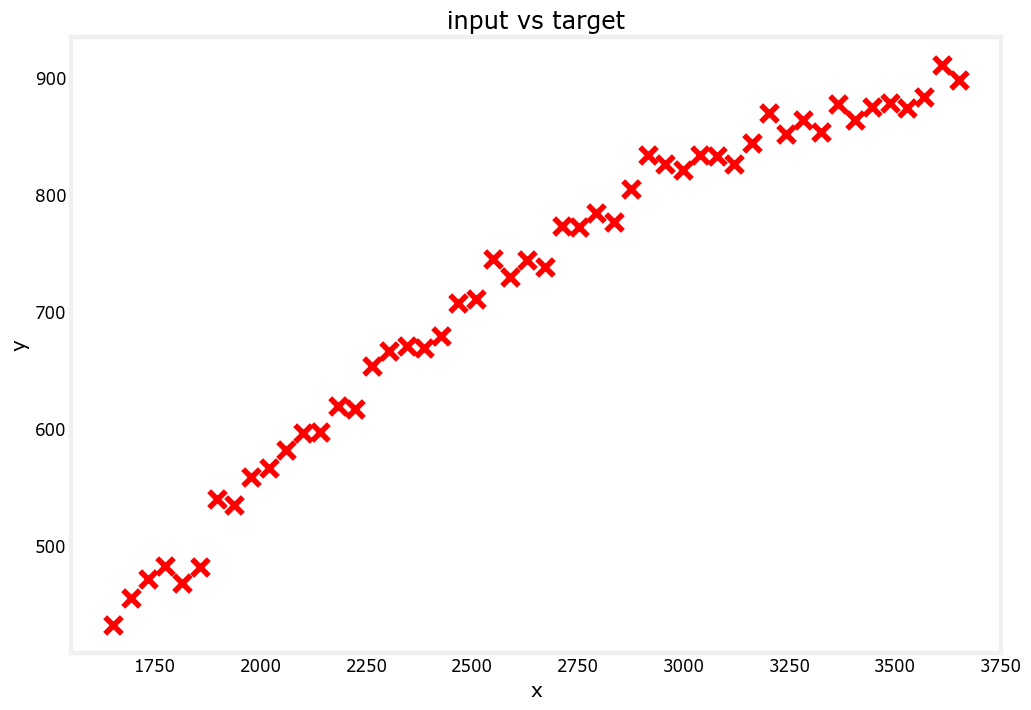

In [43]:
utils.plot_dataset(x, y, title="input vs target")

In [44]:
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)
#x_,y_ 为测试集

x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

del x_, y_

print(f"x_train.shape={x_train.shape}")
print(f"y_train.shape={y_train.shape}")
print(f"x_cv.shape={x_cv.shape}")
print(f"x_test.shape={x_test.shape}")
print(f"y_cv.shape={y_test.shape}")


x_train.shape=(30, 1)
y_train.shape=(30, 1)
x_cv.shape=(10, 1)
x_test.shape=(10, 1)
y_cv.shape=(10, 1)


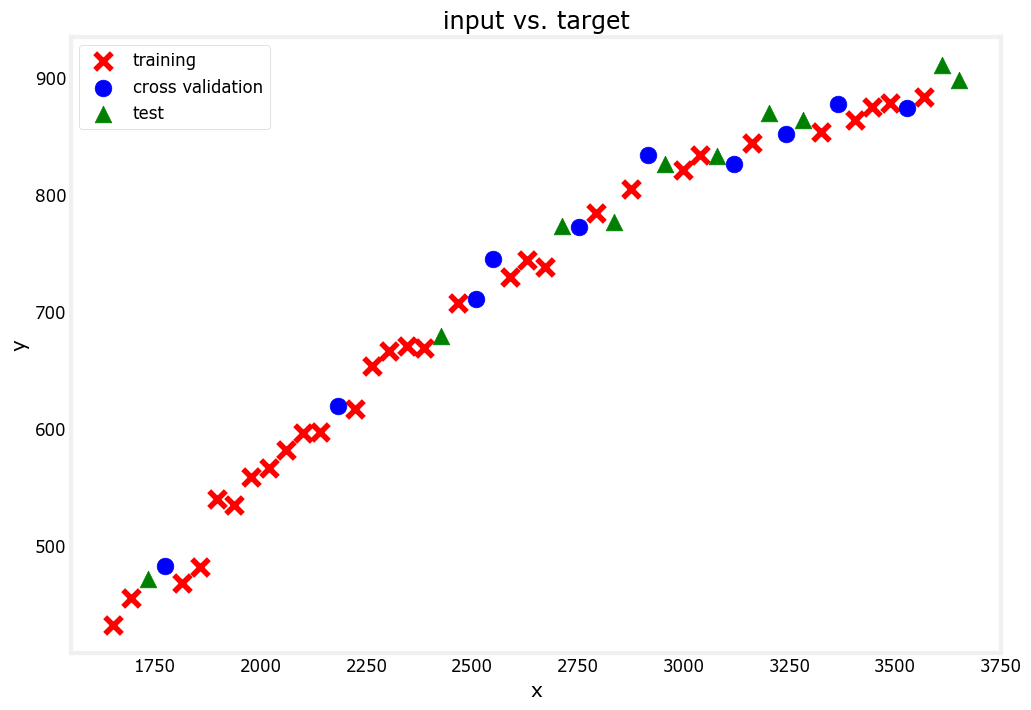

In [45]:
utils.plot_train_cv_test(x_train, y_train, x_cv, y_cv, x_test, y_test, title="input vs target")

train set mean:2504.061224489796
train set standard deviation :574.8536806268388


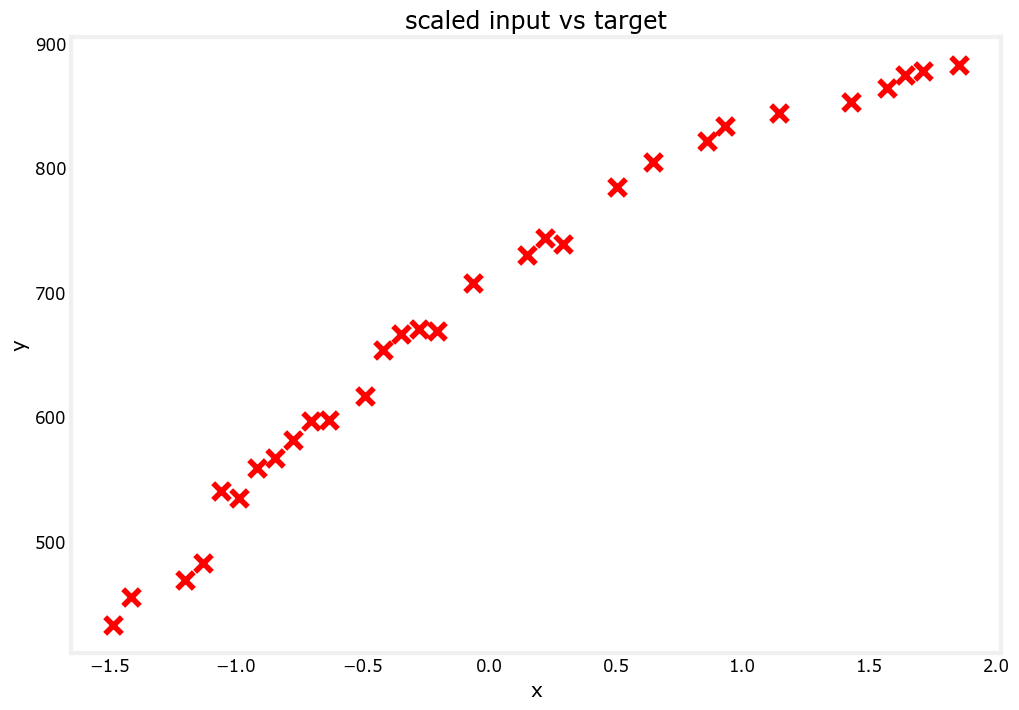

In [46]:
scaler_linear = StandardScaler()

X_train_scaled = scaler_linear.fit_transform(x_train)

print(f"train set mean:{scaler_linear.mean_.squeeze()}")
print(f"train set standard deviation :{scaler_linear.scale_.squeeze()}")

utils.plot_dataset(x=X_train_scaled, y=y_train, title="scaled input vs target")

In [47]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

LinearRegression()

In [48]:
yhat = linear_model.predict(X_train_scaled)

print(f"Training MSE(use sklearn function):{mean_squared_error(y_train, yhat) / 2}")

total_squared_error = 0

for i in range(len(yhat)):
    squared_error_i = (yhat[i] - y_train[i]) ** 2
    total_squared_error += squared_error_i
mse = total_squared_error / (2 * len(yhat))

print(f"train MSE(for-loop implementation)：{mse.squeeze()}")

Training MSE(use sklearn function):406.19374192533155
train MSE(for-loop implementation)：406.19374192533155


In [49]:
X_cv_scaled = scaler_linear.transform(x_cv)

print(f"Mean used to scale the CV set:{scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set :{scaler_linear.scale_.squeeze()}")

yhat = linear_model.predict(X_cv_scaled)

print(f"Cross validation MSE:{mean_squared_error(y_cv, yhat) / 2}")

Mean used to scale the CV set:2504.06
Standard deviation used to scale the CV set :574.8536806268388
Cross validation MSE:551.7789026952216


In [50]:
ploy = PolynomialFeatures(degree=2, include_bias=False)

X_train_mapped = ploy.fit_transform(x_train)

# print(X_train_mapped.shape)
# print(X_train_mapped[:10])
X_train_mapped[:5]

array([[3.32e+03, 1.11e+07],
       [2.34e+03, 5.50e+06],
       [3.49e+03, 1.22e+07],
       [2.63e+03, 6.92e+06],
       [2.59e+03, 6.71e+06]])

In [51]:
scaler_poly = StandardScaler()

X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)

X_train_mapped_scaled[:5]

array([[ 1.43,  1.47],
       [-0.28, -0.36],
       [ 1.71,  1.84],
       [ 0.22,  0.11],
       [ 0.15,  0.04]])

In [52]:
model = LinearRegression()
model.fit(X_train_mapped_scaled, y_train)

yhat = model.predict(X_train_mapped_scaled)
print(f"Training MSE:{mean_squared_error(y_train, yhat) / 2}")

X_cv_mapped = ploy.transform(x_cv)

x_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

yhat = model.predict(x_cv_mapped_scaled)
print(f"Cross validation MSE:{mean_squared_error(y_cv, yhat) / 2}")

Training MSE:49.11160933402513
Cross validation MSE:87.6984121111191


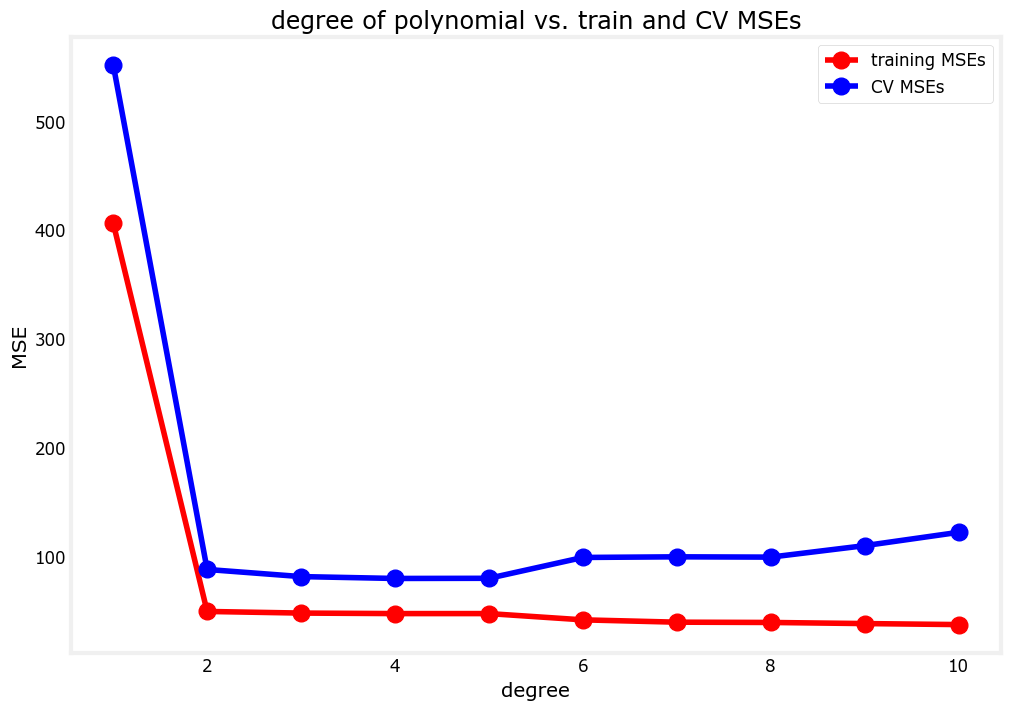

In [53]:
train_mses = []
cv_mses = []
models = []
scalers = []

for degree in range(1, 11):
    ploy = PolynomialFeatures(degree, include_bias=False)
    X_train_mapped = ploy.fit_transform(x_train)

    scaler_poly = StandardScaler()
    X_train_mapped_scaled = scaler_poly.fit_transform(X_train_mapped)
    scalers.append(scaler_poly)

    model = LinearRegression()
    model.fit(X_train_mapped_scaled, y_train)
    models.append(model)

    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    train_mses.append(train_mse)

    ploy = PolynomialFeatures(degree, include_bias=False)
    X_cv_mapped = ploy.fit_transform(x_cv)
    X_cv_mapped_scaled = scaler_poly.transform(X_cv_mapped)

    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    cv_mses.append(cv_mse)
degrees = range(1, 11)
utils.plot_train_cv_mses(degrees, train_mses, cv_mses, title="degree of polynomial vs. train and CV MSEs")


In [54]:
degree = np.argmin(cv_mses) + 1
print(f"Lowest CV MSE is found in the model with degree={degree}")

Lowest CV MSE is found in the model with degree=4


In [55]:
ploy = PolynomialFeatures(degree, include_bias=False)
X_test_mapped = ploy.fit_transform(x_test)
# X_test_mapped.shape,x_test.shape

X_test_mapped_scaled = scalers[degree - 1].transform(X_test_mapped)

yhat = models[degree - 1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Training MSE:{train_mses[degree - 1]}")
print(f"Cross Validation MSE:{cv_mses[degree - 1]}")
print(f"Test MSE:{test_mse}")


Training MSE:47.146466442636395
Cross Validation MSE:79.43134912070502
Test MSE:104.6316820528975


In [56]:
degree = 1
poly = PolynomialFeatures(degree, include_bias=False)
X_train_mapped = poly.fit_transform(x_train)
X_cv_mapped = poly.transform(x_cv)
X_test_mapped = poly.transform(x_test)

scaler = StandardScaler()
X_train_mapped_scaled = scaler.fit_transform(X_train_mapped)
X_cv_mapped_scaled = scaler.transform(X_cv_mapped)
X_test_mapped_scaled = scaler.transform(X_test_mapped)



In [57]:
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential


def build_models():
    tf.random.set_seed(20)

    model_1 = tf.keras.Sequential([
        Dense(25, activation='relu'),
        Dense(15, activation='relu'),
        Dense(1, activation='linear')
    ],
        name='model_1'
    )

    model_2 = tf.keras.Sequential([
        Dense(20, activation='relu'),
        Dense(12, activation='relu'),
        Dense(12, activation='relu'),
        Dense(20, activation='relu'),
        Dense(1, activation='linear')
    ],
        name='model_2'
    )

    model_3 = tf.keras.Sequential([
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(8, activation='relu'),
        Dense(4, activation='relu'),
        Dense(12, activation='relu'),
        Dense(1, activation='linear')
    ],
        name='model_3'
    )

    model_list = [model_1, model_2, model_3]

    return model_list

In [58]:
nn_train_mses = []
nn_cv_mses = []
nn_models = build_models()

for model in nn_models:
    model.compile(
        loss='mse',
        optimizer=keras.optimizers.Adam(learning_rate=0.1)
    )

    print(f"model_name={model.name}")

    model.fit(
        X_train_mapped_scaled, y_train, epochs=300,
        verbose=0
    )

    print("Done")

    yhat = model.predict(X_train_mapped_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    yhat = model.predict(X_cv_mapped_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

print("Result:")

for model_num in range(len(nn_train_mses)):
    print(
        f"model_{model_num + 1}:Training MSE:{train_mses[model_num]},"
        f"CV MSE:{nn_cv_mses[model_num]}"
    )

model_name=model_1
Done
1/1 [==============================] - 0s 20ms/step
model_name=model_2
Done
1/1 [==============================] - 0s 20ms/step
model_name=model_3
Done
1/1 [==============================] - 0s 20ms/step
Result:
model_1:Training MSE:406.19374192533155,CV MSE:551.7791518162775
model_2:Training MSE:49.11160933402513,CV MSE:98.89986680980527
model_3:Training MSE:47.61632235298237,CV MSE:111.08989647704149


In [59]:
model_num = 3
yhat = nn_models[model_num - 1].predict(X_test_mapped_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"selected Model :{model_num}")
print(f"Training MSE:{nn_train_mses[model_num - 1]}")
print(f"Cross Validation MSE:{nn_cv_mses[model_num - 1]}")
print(f"Test MSE:{test_mse}")

1/1 [==============================] - 0s 22ms/step
selected Model :3
Training MSE:72.21173916612429
Cross Validation MSE:111.08989647704149
Test MSE:130.96937487374265


In [60]:
data = np.loadtxt('./data/data_w3_ex2.csv', delimiter=',')

x_bc = data[:, :-1]
y_bc = data[:, -1]

y_bc = np.expand_dims(y_bc, axis=1)

print(f"the shape of input x is:{x_bc.shape}")
print(f"the shape of targets y is:{y_bc.shape}")

the shape of input x is:(200, 2)
the shape of targets y is:(200, 1)


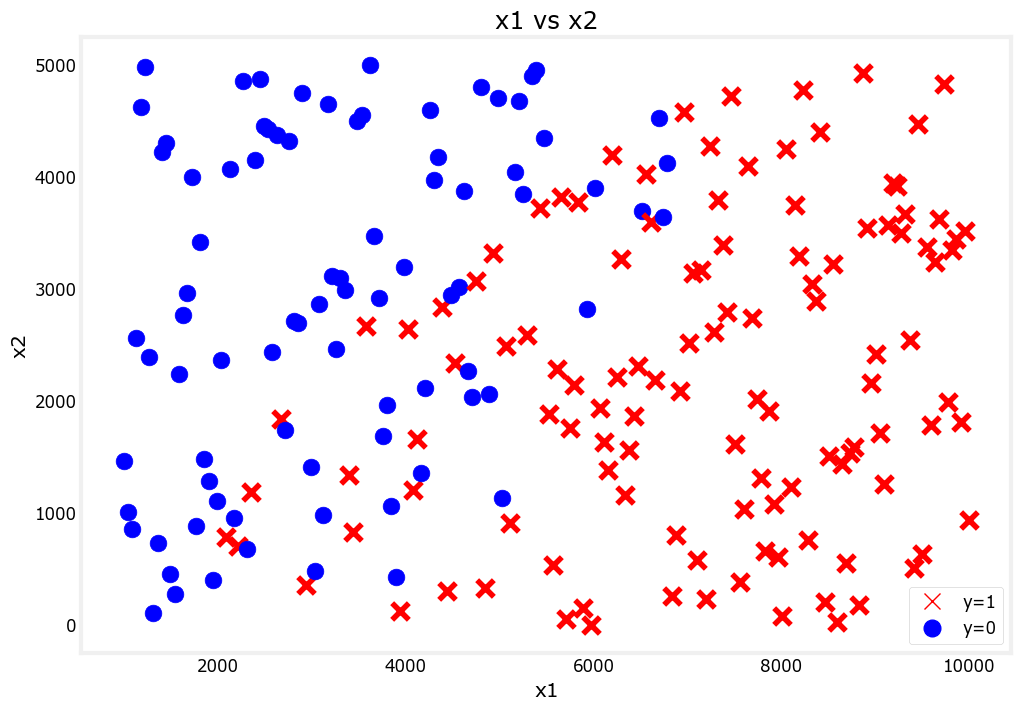

In [61]:
utils.plot_bc_dataset(x=x_bc, y=y_bc, title="x1 vs x2")

In [63]:
from sklearn.model_selection import train_test_split

x_bc_train, x_, y_bc_train, y_ = train_test_split(x_bc, y_bc, test_size=0.40, random_state=1)

x_bc_cv, x_bc_test, y_bc_cv, y_bc_test = train_test_split(x_, y_, test_size=0.5, random_state=1)

del x_, y_

print(f"the shape of the training set (input) is: {x_bc_train.shape}")
print(f"the shape of the training set (target) is: {y_bc_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_bc_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_bc_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_bc_test.shape}")
print(f"the shape of the test set (target) is: {y_bc_test.shape}")

the shape of the training set (input) is: (120, 2)
the shape of the training set (target) is: (120, 1)

the shape of the cross validation set (input) is: (40, 2)
the shape of the cross validation set (target) is: (40, 1)

the shape of the test set (input) is: (40, 2)
the shape of the test set (target) is: (40, 1)


In [65]:
scaler_linear = StandardScaler()

# Compute the mean and standard deviation of the training set then transform it
x_bc_train_scaled = scaler_linear.fit_transform(x_bc_train)
x_bc_cv_scaled = scaler_linear.transform(x_bc_cv)
x_bc_test_scaled = scaler_linear.transform(x_bc_test)

In [68]:
probabilities = np.array([0.2, 0.6, 0.7, 0.3, 0.8])

predictions = np.where(probabilities > 0.5, 1, 0)
# Ground truth labels
ground_truth = np.array([1, 1, 1, 1, 1])

# Initialize counter for misclassified data
misclassified = 0

num_predictions = len(predictions)

for i in range(num_predictions):
    if predictions[i] != ground_truth[i]:
        misclassified += 1

fraction_error = misclassified / num_predictions

print(f"probabilities:{probabilities}")
print(f"predictions :{predictions}")
print(f"targets:{ground_truth}")
print(f"misclassified data (loop):{fraction_error}")
print(f"misclassified data (np.mean):{np.mean((predictions != ground_truth))}")

probabilities:[0.2 0.6 0.7 0.3 0.8]
predictions :[0 1 1 0 1]
targets:[1 1 1 1 1]
misclassified data (loop):0.4
misclassified data (np.mean):0.4


In [70]:
nn_train_error = []
nn_cv_error = []
models_bc = utils.build_models()

for model in models_bc:
    model.compile(
        loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.01)
    )
    print(f"training {model.name}")

    model.fit(
        x_bc_train_scaled, y_bc_train,
        epochs=200,
        verbose=0
    )

    print("Done")

    threshold = 0.5
    yhat = model.predict(x_bc_train_scaled)
    yhat = tf.math.sigmoid(yhat)
    yhat = np.where(yhat >= threshold, 1, 0)
    train_error=np.mean(yhat!=y_bc_train)
    nn_train_error.append(train_error)
    
    yhat=model.predict(x_bc_cv_scaled)
    yhat=tf.math.sigmoid(yhat)
    yhat=np.where(yhat>=threshold,1,0)
    cv_error=np.mean(yhat!=y_bc_cv)
    nn_cv_error.append(cv_error)
    
for model_num in range(len(nn_train_error)):
    print(f"Model {model_num+1}: Training Set Classification Error:{nn_train_error[model_num]}\n"
          f"CV Set classification Error:{nn_train_error[model_num]}\n")
    
       

training model_1
Done
2/2 [==============================] - 0s 2ms/step
training model_2
Done
2/2 [==============================] - 0s 4ms/step
training model_3
Done
2/2 [==============================] - 0s 3ms/step
Model 1: Training Set Classification Error:0.08333333333333333
CV Set classification Error:0.08333333333333333

Model 2: Training Set Classification Error:0.08333333333333333
CV Set classification Error:0.08333333333333333

Model 3: Training Set Classification Error:0.06666666666666667
CV Set classification Error:0.06666666666666667
